# EDA

## Libraries

In [9]:
# Import Libraries
# =========================================================

# import numpy and pandas
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from heatmap import heatmap, corrplot

# Configuration of pandas
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

# Configuration of matplotlib
plt.rcParams['savefig.bbox'] = "tight"



# import sklear for preprocessing functions
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

<h3>Feature Name and Description</h3>

**active_customer**: 
Client activity indicator in our application

**age**: 
Customer age

**country_id**: 
Country of residence of the client

**credit_card**: 
Credit cards

**debit_card**: 
Debit card

**deceased**: 
Deceased index. N/S

**em_account_p**: 
easyMoney+ account

**em_account_pp**: 
easyMoney++ acount

**em_acount**: 
easyMoney account

**emc_account**: 
easyMoney Crypto account

**entry_channel**: 
Customer acquisition channel

**entry_date**: 
Date on which first easyMoney contract was signed

**funds**: 
Investment funds

**gender**: 
Gender

**loans**: 
Loans

**long_term_deposit**: 
Long term deposits

**mortgage**: 
Mortgage

**payroll**: 
payroll

**payroll_account**: 
Account awarded with a bonus due to payroll

**pension_plan**: 
Pension plan

**pk_cid**: 
Customer identifier

**pk_partition**: 
Data ingestion date

**region_code**: 
Customer's province of residence (for ES)

**salary**: 
Household gross income

**securities**: 
Securities

**segment**: 
Customer business segment

**short_term_deposit**: 
Short-term deposits


## 1. Preparation of the Dataset

In [2]:
df_comm_act = pd.read_csv("data/commercial_activity_df.csv")
df_prod = pd.read_csv("data/products_df.csv")
df_socio_dem = pd.read_csv("data/sociodemographic_df.csv")

display(df_comm_act.shape)
display(df_comm_act.head())
display(df_prod.shape)
display(df_prod.head())
display(df_socio_dem.shape)
display(df_socio_dem.head())

(5962924, 7)

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


(5962924, 18)

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


(5962924, 9)

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,4,1050614,2018-01-28,ES,50.00,V,23,N,NaN


In [3]:
# Are the pk the same for the 3 tables?

df_comm_act = df_comm_act.drop(columns='Unnamed: 0')
df_prod = df_prod.drop(columns='Unnamed: 0')
df_socio_dem = df_socio_dem.drop(columns='Unnamed: 0')

display(df_comm_act.shape)
display(df_comm_act.head())
display(df_prod.shape)
display(df_prod.head())
display(df_socio_dem.shape)
display(df_socio_dem.head())

(5962924, 6)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


(5962924, 17)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


(5962924, 8)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,1050614,2018-01-28,ES,50.00,V,23,N,NaN


In [4]:
df = pd.concat([df_comm_act, df_prod, df_socio_dem], axis=1, join="inner")

print(df.shape)

(5962924, 31)


In [5]:
# Drop pk_cid duplicate columns
# ======================================================================================
col_pk_cid = df.iloc[:,0].copy()
col_pk_partition = df.iloc[:,1].copy()
df = df.drop(columns=['pk_cid','pk_partition'],axis = 1)
df['pk_cid']=col_pk_cid
df['pk_partition']=col_pk_partition

df.head().T

,0,1,2,3,4
entry_date,2018-01-12,2015-08-10,2015-08-10,2015-08-10,2015-08-10
entry_channel,KHL,KHE,KHE,KHD,KHE
active_customer,1.00,0.00,0.00,0.00,1.00
segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0
securities,0,0,0,0,0
long_term_deposit,0,0,0,0,0


In [6]:
# Create Date column
# ======================================================================================
df['pk_partition'] = pd.to_datetime(df['pk_partition'], format='%Y-%m-%d')
df['year'] = df['pk_partition'].dt.year
df['month'] = df['pk_partition'].dt.month
df['year_month']=pd.to_datetime(df['pk_partition']).dt.to_period('M')

In [7]:
# Create Region_Name column
# ======================================================================================
df['region_code'].fillna(999, inplace=True)

regions={1:'Alava',
         2:'Albacete',
         3:'Alicante',
         4:'Almeria',
         5:'Avila',
         6:'Badajoz',
         7:'Baleares',
         8:'Barcelona',
         9:'Burgos',
         10:'Caceres',
         11:'Cadiz',
         12:'Castellon',
         13:'Ciudad Real',
         14:'Cordoba',
         15:'La Coruna',
         16:'Cuenca',
         17:'Gerona',
         18:'Granada',
         19:'Guadalajara',
         20:'Guipuzcoa',
         21:'Huelva',
         22:'Huesca',
         23:'Jaen',
         24:'Leon',
         25:'Lerida',
         26:'La Rioja',
         27:'Lugo',
         28:'Madrid',
         29:'Malaga',
         30:'Murcia',
         31:'Navarra',
         32:'Orense',
         33:'Asturias',
         34:'Palencia',
         35:'Las Palmas',
         36:'Pontevedra',
         37:'Salamanca',
         38:'Santa Cruz de Tenerife',
         39:'Cantabria',
         40:'Segovia',
         41:'Sevilla',
         42:'Soria',
         43:'Tarragona',
         44:'Teruel',
         45:'Toledo',
         46:'Valencia',
         47:'Valladolid',
         48:'Vizcaya',
         49:'Zamora',
         50:'Zaragoza',
         51:'Ceuta',
         52:'Melilla',
         999:'Not_available'}

df['region_name']=df['region_code'].map(regions)

## 2: Data Understanding<a class="anchor" id="data_understanding"></a>

## 2.1: Univariate data analysis<a class="anchor" id="univariate_data_analysis"></a>


### 2.1.1. Dataset size<a class="anchor" id="dataset_size"></a>


In [8]:
# Get the number of registers, attributes and in-memory size
# ======================================================================================
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Columns: 31 entries, entry_date to region_name
dtypes: datetime64[ns](1), float64(5), int64(17), object(7), period[M](1)
memory usage: 1.4+ GB


### 2.1.2.  Direct visualization of the data<a class="anchor" id="direct_visualization"></a>

In [9]:
# Overview of the columns and its data
# ======================================================================================
df.head(2).T

,0,1
entry_date,2018-01-12,2015-08-10
entry_channel,KHL,KHE
active_customer,1.00,0.00
segment,02 - PARTICULARES,03 - UNIVERSITARIO
short_term_deposit,0,0
loans,0,0
mortgage,0,0
funds,0,0
securities,0,0
long_term_deposit,0,0


### 2.1.3. Types of variables available<a class="anchor" id="variable_types"></a>

In [10]:
# Data Types
# ======================================================================================
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 31 columns):
 #   Column              Dtype         
---  ------              -----         
 0   entry_date          object        
 1   entry_channel       object        
 2   active_customer     float64       
 3   segment             object        
 4   short_term_deposit  int64         
 5   loans               int64         
 6   mortgage            int64         
 7   funds               int64         
 8   securities          int64         
 9   long_term_deposit   int64         
 10  em_account_pp       int64         
 11  credit_card         int64         
 12  payroll             float64       
 13  pension_plan        float64       
 14  payroll_account     int64         
 15  emc_account         int64         
 16  debit_card          int64         
 17  em_account_p        int64         
 18  em_acount           int64         
 19  country_id          object        
 20  re

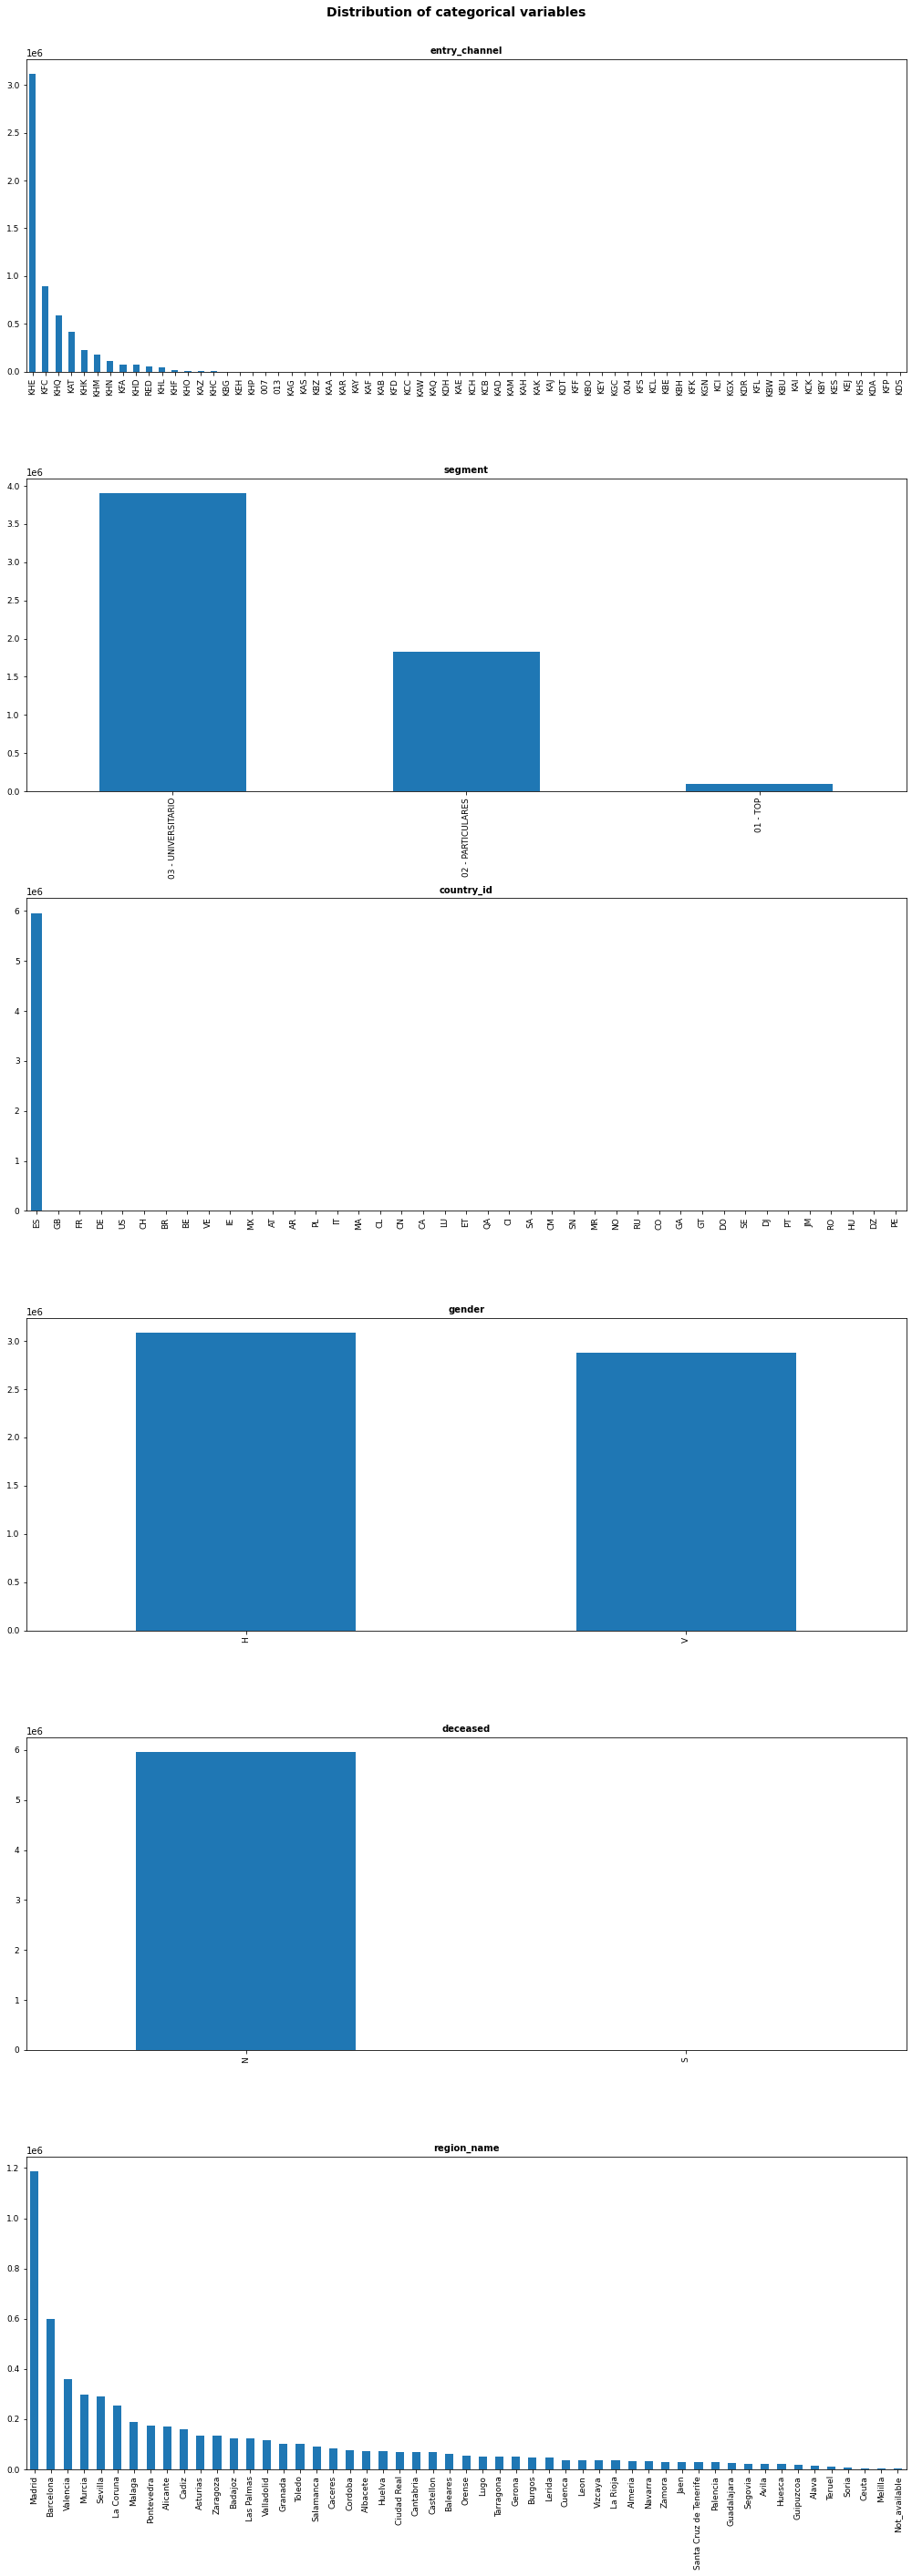

In [11]:
# First, understand what are the categorical features
# ======================================================================================
columns_to_ignore = ['pk_partition','entry_date']

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 40))
axes = axes.flat
columnas_object = [col for col in df.select_dtypes(include=['object']).columns if col not in columns_to_ignore]

for i, col in enumerate(columnas_object):
    df[col].value_counts().plot.bar(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle('Distribution of categorical variables',
             fontsize = 14, fontweight = "bold");

Text(0.5, 0.98, 'Distribution of product features')

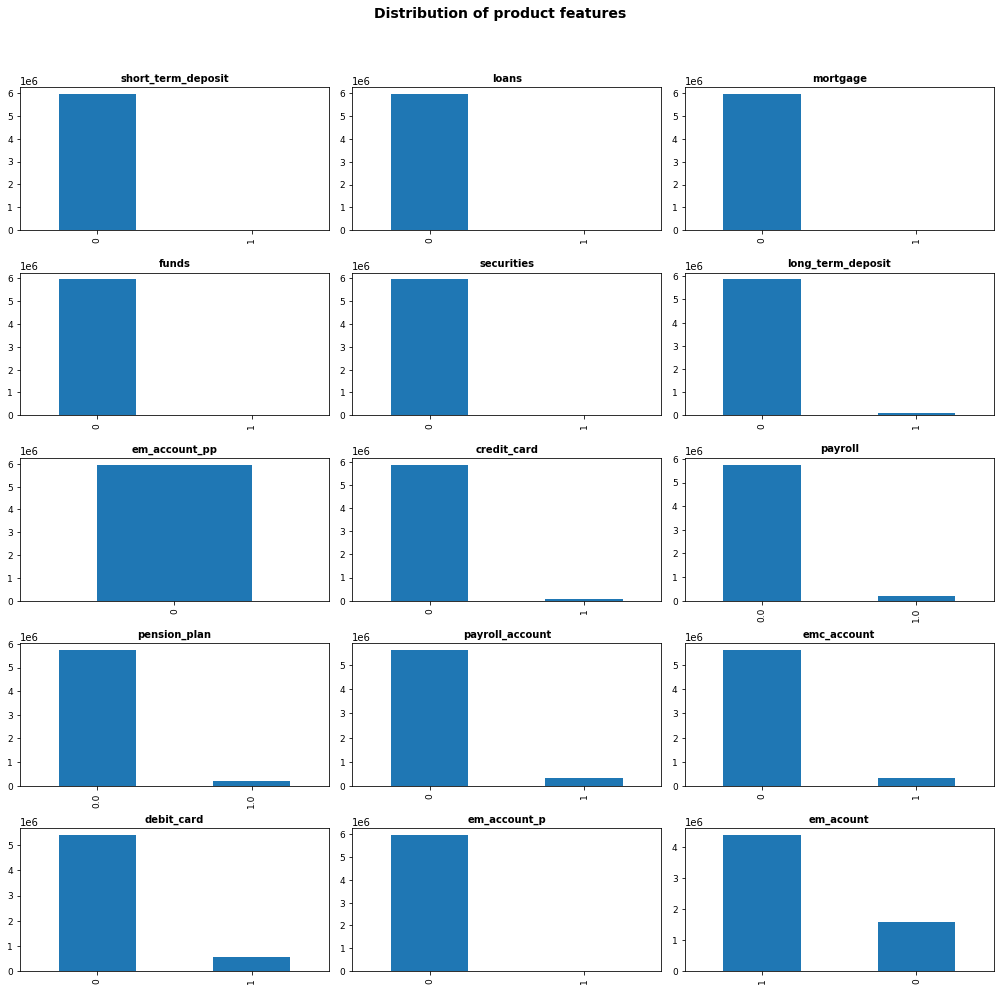

In [12]:
# Visualization of boolean features
# ======================================================================================
bool_feat = ['short_term_deposit','loans','mortgage','funds','securities',
            'long_term_deposit','em_account_pp','credit_card','payroll',
            'pension_plan','payroll_account','emc_account','debit_card',
            'em_account_p','em_acount'
                ]

# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(bool_feat):
    barplot = df[col].value_counts().plot.bar(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Distribution of product features', fontsize = 14, fontweight = 'bold')

Variance for most features is very low.
- em_account_pp: we have no customers for this one. Will not be useful for the modelling but yes to say to the board that something needs to be done.
- even though the variance is low we might recognize patterns in the ones we have that will help us understand which type of client is purchasing which product
Also, since there are monthly partitions for each client, i think it will be more useful to check the evolution of the products on a monthly basis and so on

### 2.1.4. Descriptive statistics<a class="anchor" id="descriptive_statistics"></a>

In [13]:
# descriptive statistics for categorical values
# ======================================================================================
df.describe(include=object).T.style.background_gradient(subset=['count','freq'])

,count,unique,top,freq
entry_date,5962924,1499,2017-07-28,57389
entry_channel,5829891,68,KHE,3113947
segment,5828980,3,03 - UNIVERSITARIO,3900166
country_id,5962924,41,ES,5960672
gender,5962899,2,H,3087502
deceased,5962924,2,N,5961849
region_name,5962924,53,Madrid,1185757


In [14]:
# descriptive statistics for numerical values
# ======================================================================================
df.describe(include=[np.number]).T.style.background_gradient(subset=["mean","50%"], low=0.75, high=1.0)

,count,mean,std,min,25%,50%,75%,max
active_customer,5962924.000000,0.403384,0.490577,0.000000,0.000000,0.000000,1.000000,1.000000
short_term_deposit,5962924.000000,0.002582,0.050744,0.000000,0.000000,0.000000,0.000000,1.000000
loans,5962924.000000,0.000078,0.008859,0.000000,0.000000,0.000000,0.000000,1.000000
mortgage,5962924.000000,0.000054,0.007371,0.000000,0.000000,0.000000,0.000000,1.000000
funds,5962924.000000,0.003371,0.057959,0.000000,0.000000,0.000000,0.000000,1.000000
securities,5962924.000000,0.003712,0.060811,0.000000,0.000000,0.000000,0.000000,1.000000
long_term_deposit,5962924.000000,0.016881,0.128826,0.000000,0.000000,0.000000,0.000000,1.000000
em_account_pp,5962924.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
credit_card,5962924.000000,0.011884,0.108366,0.000000,0.000000,0.000000,0.000000,1.000000
payroll,5962863.000000,0.034511,0.182539,0.000000,0.000000,0.000000,0.000000,1.000000


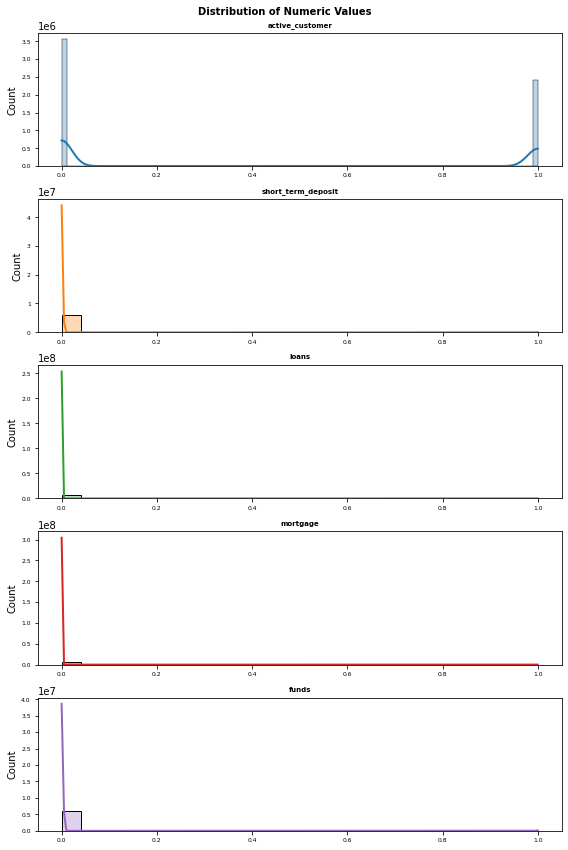

In [15]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[:5]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

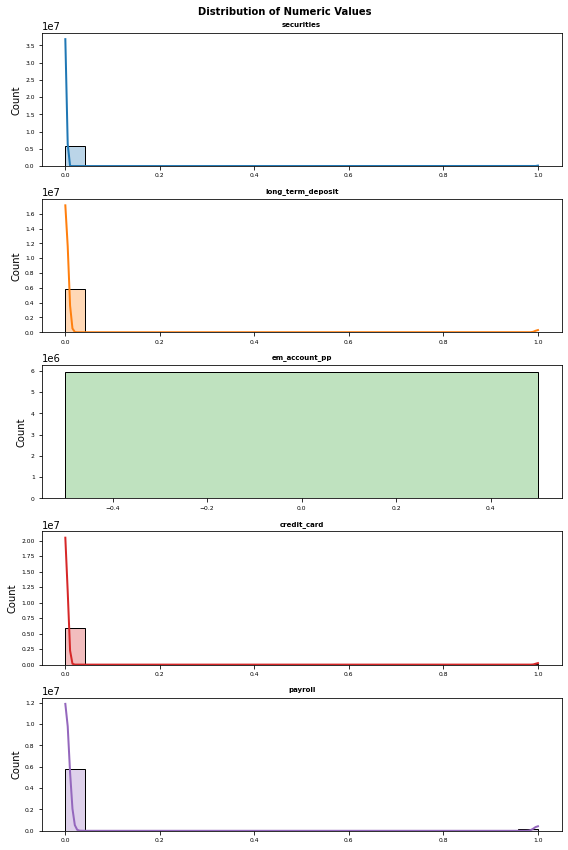

In [16]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[5:10]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

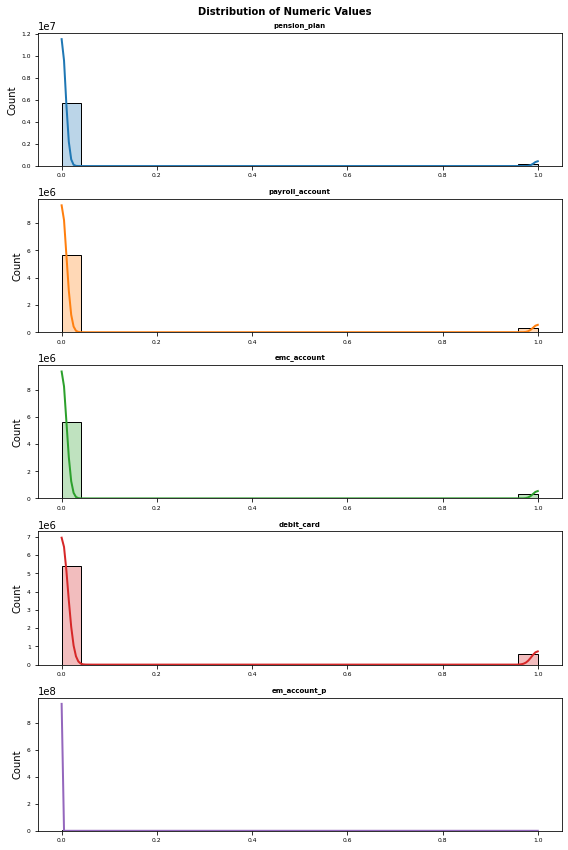

In [17]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[10:15]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

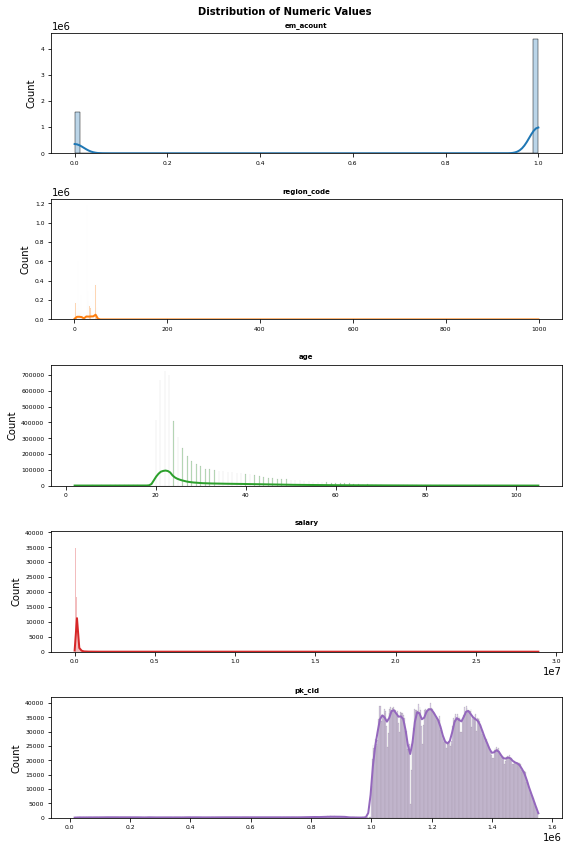

In [18]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[15:20]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

### 2.1.5. Number/fractions of null values<a class="anchor" id="null_values"></a>

In [19]:
def missing_values (data):
        missing_number = data.isnull().sum().sort_values(ascending=False)
        missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
        missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Percentage %'])
        return missing_values
print('The size of the data set is',len(df))
missing_values(df)

The size of the data set is 5962924


,Missing_Number,Percentage %
salary,1512103,25.36
segment,133944,2.25
entry_channel,133033,2.23
pension_plan,61,0.00
payroll,61,0.00
gender,25,0.00
deceased,0,0.00
region_code,0,0.00
age,0,0.00
entry_date,0,0.00


### 2.1.7 Identification of Outliers<a class="anchor" id="identification_outliers"></a>

#### Numercial Values

In [20]:
# Check if there are outliers in the data (numerical values)
# ======================================================================================
def Outliers(data):
    numerical_features = [col for col in df.select_dtypes(include=np.number).columns]
    for col in numerical_features:
        Q3 = np.quantile(data[col], 0.75)
        Q1 = np.quantile(data[col], 0.25)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        outliers_upper= len(data[data[col]>upper_range])
        outliers_lower= len(data[data[col]<lower_range])
        print("IQR value for column {} is: {} " .format(col, IQR))
        print("LOWER_RANGE value for column {}  is: {} " .format (col, lower_range))
        print("UPPER_RANGE value for column {}  is: {} ".format (col, upper_range))
        print("There are {} upper outliers for {} column ".format (outliers_upper, col))
        print('''There are {} lower outliers for  {} column 
        '''.format (outliers_lower, col))
        filtered_data = data[data[col] <= upper_range]
Outliers(df) 

IQR value for column active_customer is: 1.0 
LOWER_RANGE value for column active_customer  is: -1.5 
UPPER_RANGE value for column active_customer  is: 2.5 
There are 0 upper outliers for active_customer column 
There are 0 lower outliers for  active_customer column 
        
IQR value for column short_term_deposit is: 0.0 
LOWER_RANGE value for column short_term_deposit  is: 0.0 
UPPER_RANGE value for column short_term_deposit  is: 0.0 
There are 15394 upper outliers for short_term_deposit column 
There are 0 lower outliers for  short_term_deposit column 
        
IQR value for column loans is: 0.0 
LOWER_RANGE value for column loans  is: 0.0 
UPPER_RANGE value for column loans  is: 0.0 
There are 468 upper outliers for loans column 
There are 0 lower outliers for  loans column 
        
IQR value for column mortgage is: 0.0 
LOWER_RANGE value for column mortgage  is: 0.0 
UPPER_RANGE value for column mortgage  is: 0.0 
There are 324 upper outliers for mortgage column 
There are 0 low

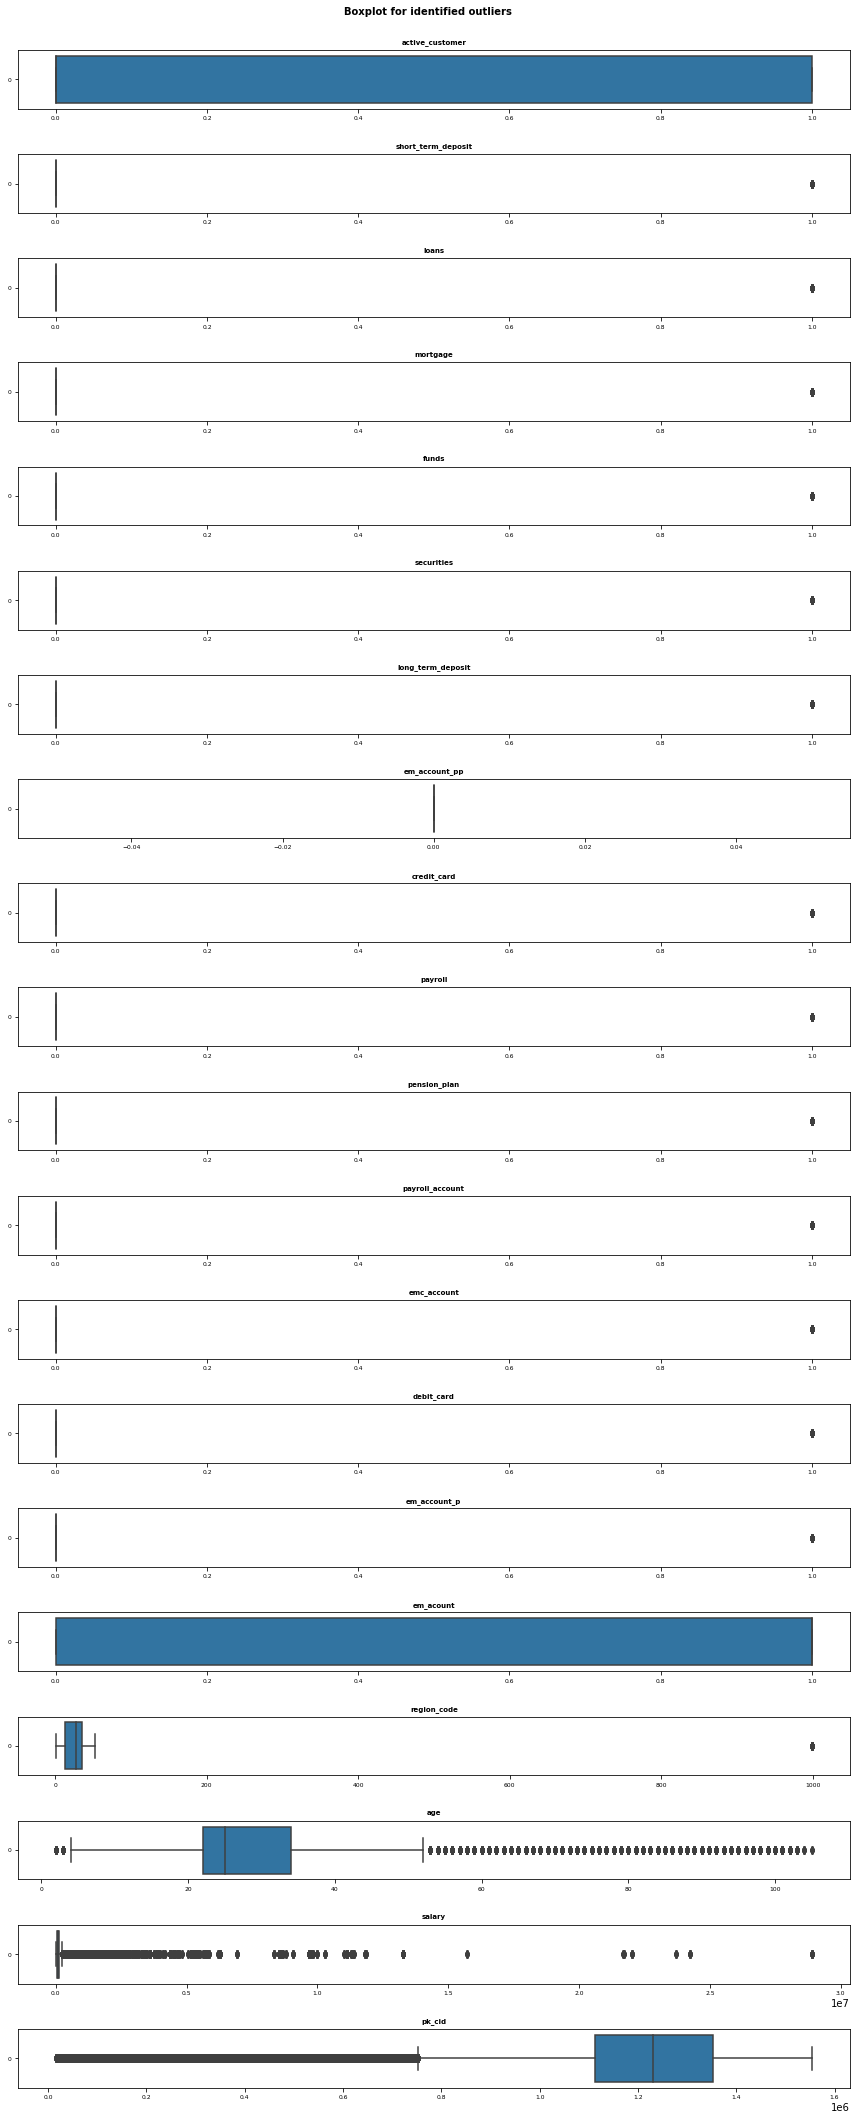

In [25]:
# Boxplot for product columns with outliers
# ======================================================================================
cols_to_ignore = ['index','Place of Service','concat_code_description_bin','provider_type_bin','state_bin','year','month']
fig, axes = plt.subplots(nrows=20, ncols=1, figsize=(12, 30))
axes = axes.flat
col_out = [col for col in df.select_dtypes(include=np.number).columns if col not in cols_to_ignore]

for i, col in enumerate(col_out):
    sns.boxplot(data=df[col], 
                ax = axes[i], orient='h')
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')
    
fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle('Boxplot for identified outliers',
             fontsize = 10, fontweight = "bold");

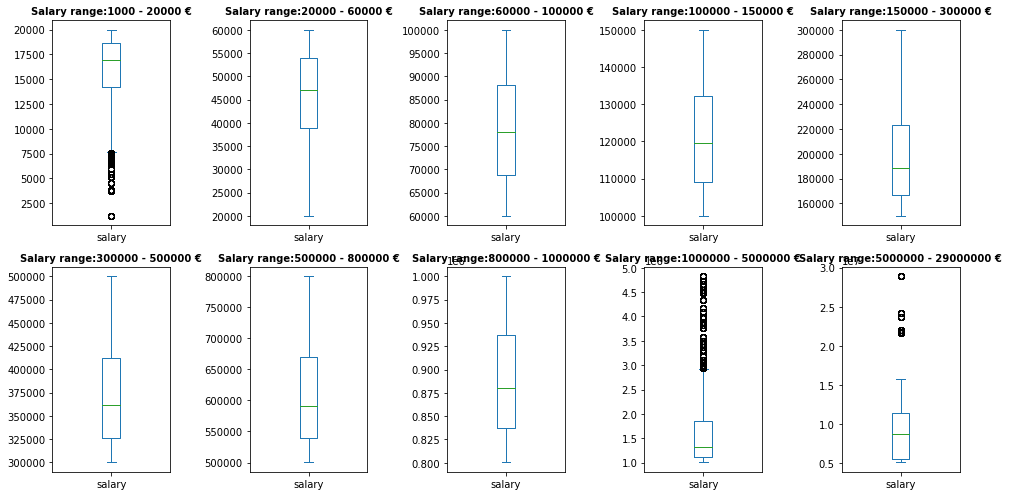

In [26]:
# Deep dive into Salary Outliers
# ======================================================================================
_salary_plot_limits = [20000, 60000, 100000, 150000, 300000, 500000, 800000, 1000000, 5000000, 29000000]
lowlim = 1000

fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (14,7))
axes = axes.flat

# plot
for i, limit in enumerate(_salary_plot_limits):
    df['salary'][(df['salary']>lowlim) & (df['salary']<limit)].plot.box(ax = axes[i])
    axes[i].set_title(f"Salary range:{lowlim} - {limit} €", fontsize = 10, fontweight = 'bold')
    lowlim = limit

fig.tight_layout()

#### Categorical Values

In [27]:
# Understand the cardinality of the categorical features
# ======================================================================================
categorical_features = [col for col in df.select_dtypes(include=object).columns]

for col in categorical_features:
    print('\nFrequency of Categories for variable %s'%col)
    print(df[col].value_counts().sort_values(ascending=False))


Frequency of Categories for variable entry_date
2017-07-28    57389
2017-10-03    54287
2017-08-04    45746
2016-10-14    40804
2016-08-03    33414
              ...  
2015-06-09       11
2017-08-10       11
2015-09-30       11
2018-05-31        9
2017-05-01        7
Name: entry_date, Length: 1499, dtype: int64

Frequency of Categories for variable entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
KHM     176591
KHN     108434
KFA      79020
KHD      75899
RED      60601
KHL      41736
KHF      20657
KHO       8247
KAZ       5635
KHC       5241
KBG       1662
KEH        728
KHP        691
007        613
013        397
KAG        335
KAS        305
KBZ        198
KAA        193
KAR        157
KAY        149
KAF        123
KAB         95
KFD         91
KCC         89
KAW         65
KAQ         52
KDH         51
KCH         48
KAE         48
KCB         47
KAD         45
KAM         43
KAH         40
KAK         34
KAJ         33
KDT         23
KFF 

## MLC2.2: Multivariate data analysis<a class="anchor" id="multivariate_data_analysis"></a>


### 2.2.1 Plot Features over time <a class="anchor" id="cor_num_var"></a>

Text(0.5, 0.98, 'Monthly evolution of product features')

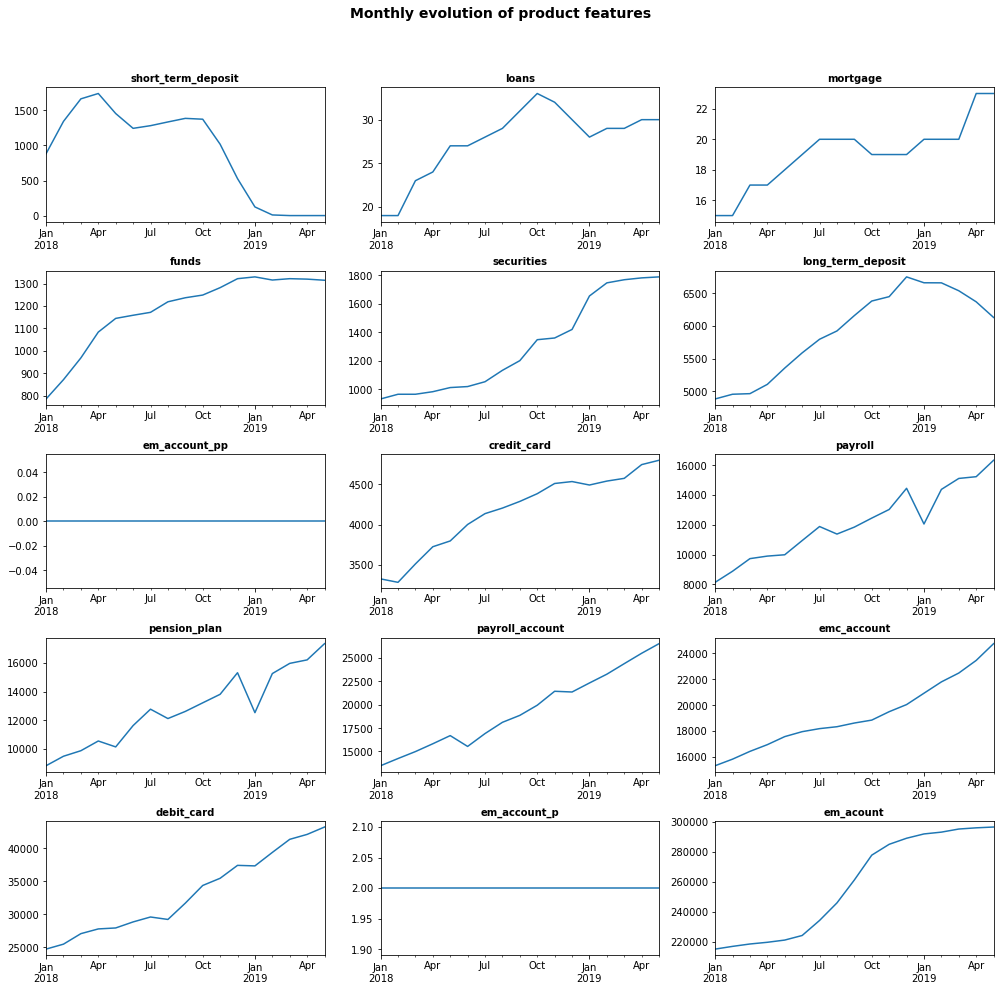

In [28]:
# Plot the Product features against over time
# ======================================================================================

df['pk_partition'] = pd.to_datetime(df['pk_partition'], format='%Y-%m-%d')
products_df_bydate = df.set_index('pk_partition')

# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14))  
axes = axes.flat

# plot
for i, col in enumerate(bool_feat):
    products_df_bydate.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')


I think it is easy to see now the cumulative of the different products over time one first thought that comes to mind is that there might be too many products and they might be biting off more than they can chew
The most striking figures are:
- Short term deposit: started ok, has gone to zero
- loans and mortgages: we have almost no clients compared with the client base we have.

One thing to look at  is the revenue that comes from these products because if it is high then it would be worth keeping it and push to get more clients
- em_account_p / pp : 2 clients for the former and 0 for the latter in the whole thing. I wonder if those two are the CEO and the marketing guy.
In any case, this needs to be notified for sure to the board.
For the rest:
- long term deposit is going down, together with short term deposit it seems that the current client base prefers the em wallet to do other things like having a second card or some money for things like crypto and so on. It looks like a revolut sort of company.
- funds, securities and basic accounts are stable for now.
- the other are streadily increasing

Text(0.5, 0.98, 'Active Customers Feature')

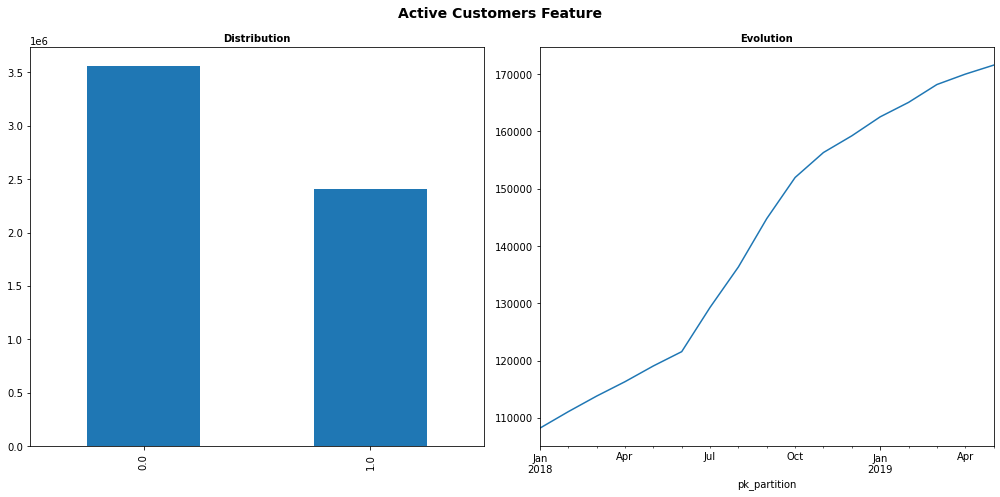

In [29]:
# Plot the Customer features against over time
# ======================================================================================
commercial_df_bydate = df.set_index('pk_partition')

# instantiate figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(14,7)) 
axes = axes.flat

# plot
df['active_customer'].value_counts().plot.bar(ax = axes[0])
commercial_df_bydate.resample('M')['active_customer'].sum().plot(ax = axes[1])

# format
axes[0].set_title('Distribution', fontsize = 10, fontweight = 'bold')
axes[1].set_title('Evolution', fontsize = 10, fontweight = 'bold')
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Active Customers Feature', fontsize = 14, fontweight = 'bold')

Less than a 50% of active customers but very good evolution

Text(0.5, 0.98, 'Monthly evolution of segments')

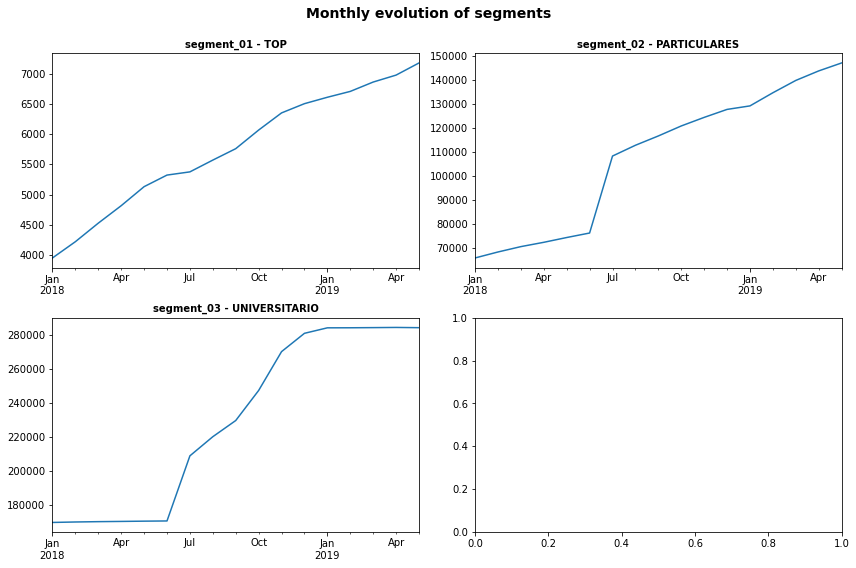

In [30]:
# Evolution of Segments overtime
# ======================================================================================
_dummy_dataset = pd.get_dummies(commercial_df_bydate['segment'], prefix = 'segment')
commercial_df_bydate = pd.concat([commercial_df_bydate,_dummy_dataset],axis = 1)

# columns to plot
_aux_segment_cols = [col for col in commercial_df_bydate.columns if "segment_" in col]

# instantiate figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(12,8)) #  
axes = axes.flat

# plot
for i, col in enumerate(_aux_segment_cols):
    commercial_df_bydate.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Monthly evolution of segments', fontsize = 14, fontweight = 'bold')

Top category steadily increasing over time, we will have to check which kind of products they have something happened in June 2018 which was a huge success for the company, during that month they got a sharp increase on Universitaries, individuals and unknowns

Universitaries seems saturated while particular keeps increasing and I am going to assume that they are doing a better job at capturing the segment and that's why we see the big drop

In [31]:
# Evolution of Churn overtime
# ======================================================================================
socio_df_2018_01=df[df['year_month']=='2018-01']
socio_df_2019_05=df[df['year_month']=='2019-05']

start_customers=socio_df_2018_01['pk_cid'].unique()
end_customers=socio_df_2019_05['pk_cid'].unique()

churn_customers=[]
for cus in start_customers:
    if cus in end_customers:
        pass
    else:
        churn_customers.append(cus)

len(churn_customers)
churn_df=df.loc[df['pk_cid'].isin(churn_customers),:]
churn_subset=pd.DataFrame(churn_df['year_month'].value_counts().sort_values(ascending=False))
churn_subset.columns=['Total_Clients']

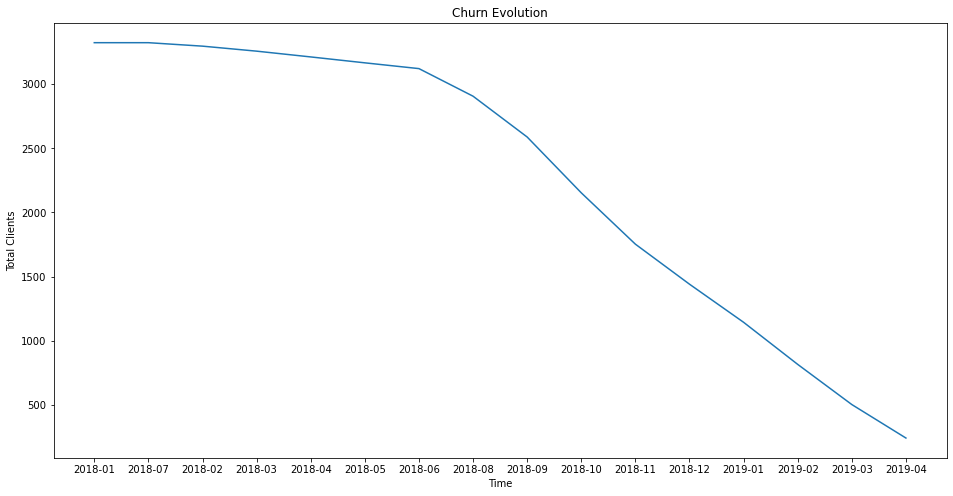

In [32]:
# Evolution of Churn overtime plot
# ======================================================================================
#Change Plot Size
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(churn_subset.index.strftime("%Y-%m"), churn_subset['Total_Clients'])
plt.title('Churn Evolution')
plt.xlabel('Time')
plt.ylabel('Total Clients')

plt.show()

In [33]:
# Evolution of New Customers overtime
# ======================================================================================
new_customers=[]
for cus in end_customers:
    if cus in start_customers:
        pass
    else:
        new_customers.append(cus)

len(new_customers)

new_df=df.loc[df['pk_cid'].isin(new_customers),:]
new_subset=pd.DataFrame(new_df['year_month'].value_counts().sort_values(ascending=True))
new_subset.columns=['Total_Clients']
new_subset

,Total_Clients
2018-02,3597
2018-03,6857
2018-04,9569
2018-05,12384
2018-06,14963
2018-07,97116
2018-08,110785
2018-09,132938
2018-10,159738
2018-11,174391


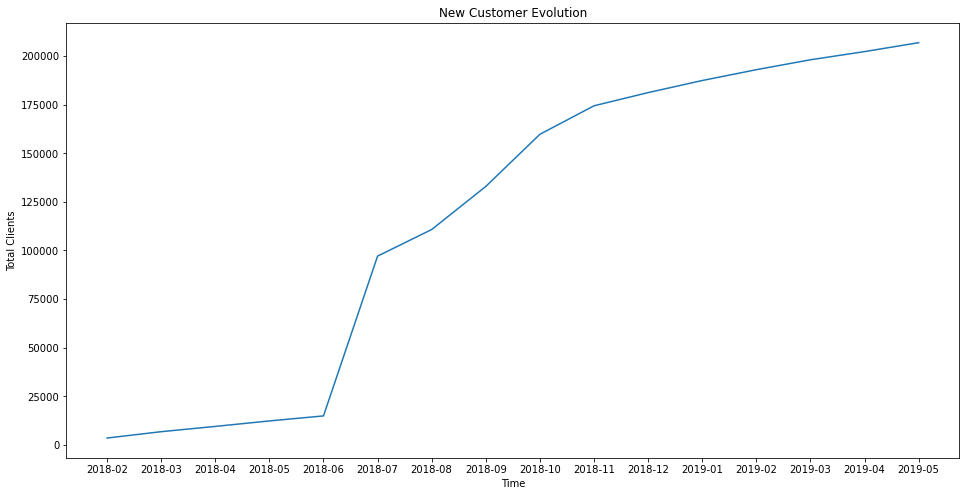

In [34]:
# Evolution of New Customers overtime plot
# ======================================================================================
#Change Plot Size
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(new_subset.index.strftime("%Y-%m"), new_subset['Total_Clients'])
plt.title('New Customer Evolution')
plt.xlabel('Time')
plt.ylabel('Total Clients')

plt.show()

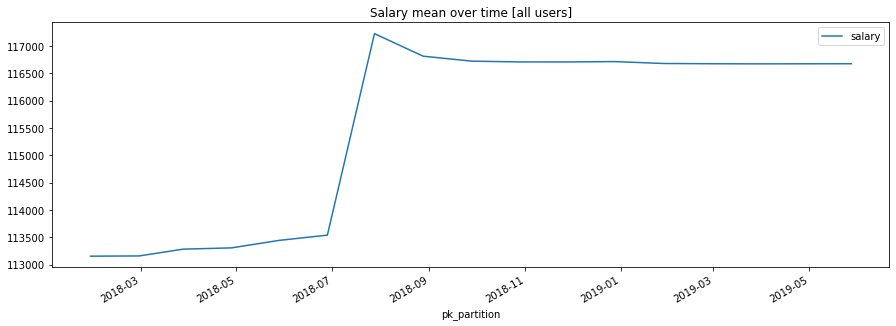

In [35]:
# Evolution of Salary overtime plot
# ======================================================================================
df.groupby("pk_partition").agg({"salary": "mean"}).plot(figsize = (15, 5), title = "Salary mean over time [all users]")

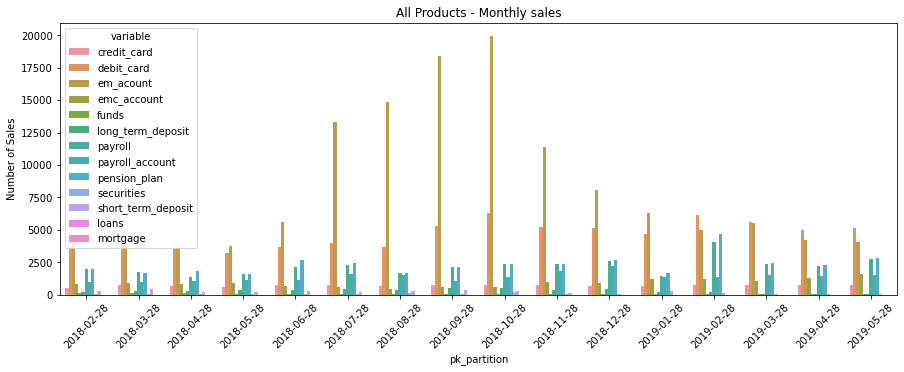

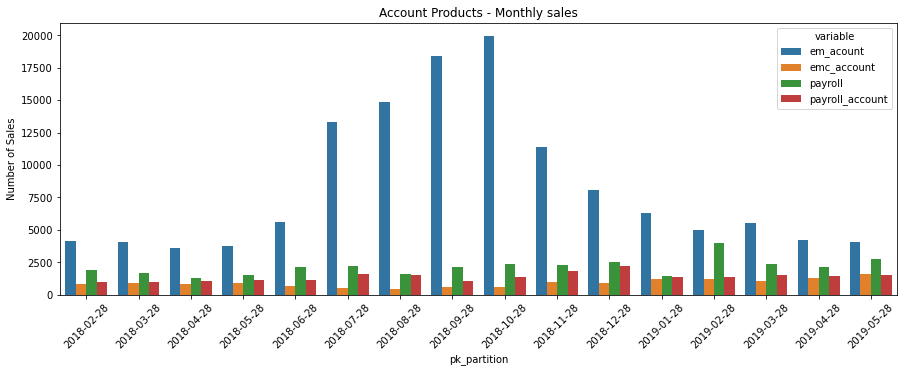

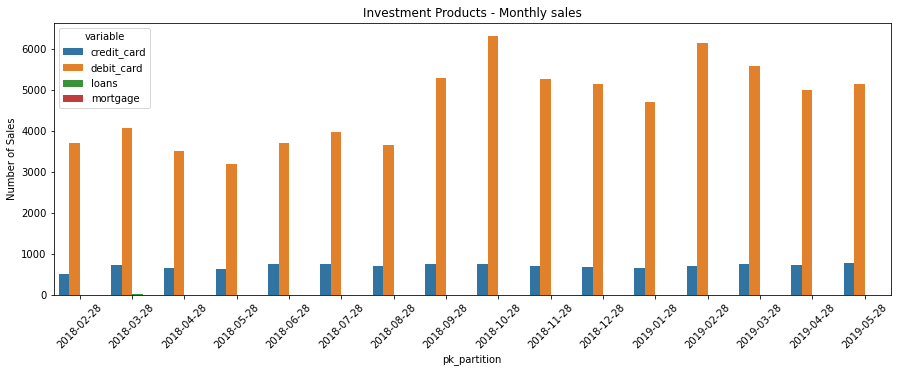

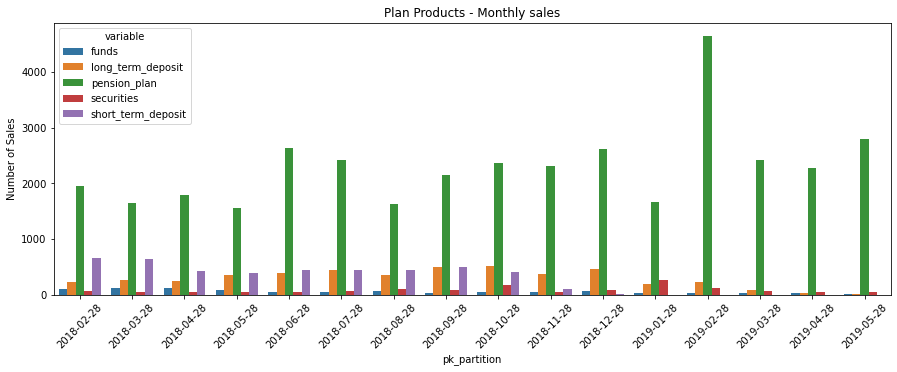

In [36]:
# Evolution of Sales overtime plot
# ======================================================================================
def monthly_sales_bars(data, product_list, title, plot = True):

    df__ = data.reset_index().melt(id_vars = ["pk_partition", "pk_cid"], value_vars = product_list)
    
    df__ = df__[(df__["value"] == 1) & (df__.groupby("pk_cid")["value"].shift() == 0)]
    result = df__.groupby(["pk_partition", "variable"])["pk_cid"].nunique().reset_index(name = "sales")
    result["pk_partition"] = result["pk_partition"].astype(str)
    result = result[result["pk_partition"] != "2018-01-28"] # skipping the first month, as we can't compare with the previous month (we don't have the data)

    if plot == True:
        plt.figure(figsize = (15, 5))
        sns.barplot(x = "pk_partition", y = "sales", hue = "variable", data = result)
        plt.ylabel("Number of Sales")
        plt.title(f"{title} - Monthly sales")
        plt.xticks(rotation = 45)
        plt.show()

    return result

#List all products
products = ["short_term_deposit", "loans", "mortgage", "funds","securities", 
           "long_term_deposit", "credit_card", "payroll","pension_plan", 
           "payroll_account", "emc_account", "debit_card", "em_account_p", "em_acount"]
products_plans = ["pension_plan", "securities", "short_term_deposit", "long_term_deposit", "funds"]
products_invest = ["loans", "mortgage", "debit_card", "credit_card"]
product_accounts = ["payroll", "payroll_account", "em_account_p", "em_acount" , "emc_account"]

#Plot
all_sales = monthly_sales_bars(df, products, "All Products")
account_sales = monthly_sales_bars(df, product_accounts, "Account Products")
invest_sales = monthly_sales_bars(df, products_invest, "Investment Products")
plan_sales = monthly_sales_bars(df, products_plans, "Plan Products")

In [79]:
# Evolution of Revenue overtime plot
# ======================================================================================
product_revenue_map = {"short_term_deposit": 60, 
                       "loans": 40, 
                       "mortgage": 40, 
                       "funds": 60, 
                       "securities": 60, 
                       "long_term_deposit": 60, 
                       "credit_card": 40, 
                       "payroll": 10, 
                       "pension_plan": 60, 
                       "payroll_account": 10, 
                       "emc_account": 10, 
                       "debit_card": 40, 
                       "em_account_p": 10, 
                       "em_acount": 10}

def revenue_plotter(data, category, title, val_sort = False):

    data["revenue"] = data["sales"] * data["variable"].map(product_revenue_map)
    plot_df = data.groupby(category)[["revenue", "sales"]].sum().reset_index()
    
    if val_sort != False:
        plot_df.sort_values(by = val_sort, ascending = False, inplace = True)
        plot_df.reset_index(inplace = True)
    
    tot_sales, avg_sales= plot_df["sales"].sum(), plot_df["sales"].mean() 
    tot_rev, avg_rev = plot_df["revenue"].sum(), plot_df["revenue"].mean()
    average_df = data.groupby("pk_partition")["revenue"].sum()

    plt.figure(figsize = (15,5))
    sns.barplot(x = plot_df[category], y = plot_df["revenue"], color = "CornflowerBlue")
    for i in range(len(plot_df)):
        plt.text(i, plot_df["revenue"][i], "{:,}".format((int(plot_df["revenue"][i]))) + " €", ha = "center", color = "black")
        plt.text(i, 0, "{:,}".format((int(plot_df["sales"][i]))), ha = "center", color = "black")

    plt.ylabel(f"{title} sales in €")
    plt.title(f"{title}\n Total revenue: {tot_rev:,.0f} €\nTotal number of sales: {tot_sales:,.0f}\nMonthly AVG: {average_df.mean():,.0f} € || {avg_sales:,.0f} sales")
    plt.xticks(rotation = 45) 
    plt.show()

#List all products
products = ["short_term_deposit", "loans", "mortgage", "funds","securities", 
           "long_term_deposit", "credit_card", "payroll","pension_plan", 
           "payroll_account", "emc_account", "debit_card", "em_account_p", "em_acount"]
products_plans = ["pension_plan", "securities", "short_term_deposit", "long_term_deposit", "funds"]
products_invest = ["loans", "mortgage", "debit_card", "credit_card"]
product_accounts = ["payroll", "payroll_account", "em_account_p", "em_acount" , "emc_account"]

#Plot
revenue_plotter(all_sales, "pk_partition", "All Products")
revenue_plotter(account_sales, "pk_partition", "Account Products")
revenue_plotter(invest_sales, "pk_partition", "Investment Products")
revenue_plotter(plan_sales, "pk_partition", "Plan Products")

NameError: name 'all_sales' is not defined

### 2.2.3 Cross-tabs <a class="anchor" id="cross_tab"></a>

#### Correlation between binary features

In [38]:
# Correlation between binary features
# ======================================================================================
def feature_vs_target_w_lengh(data, feature, TARGET, active_customers = True, grouped = True):

    title_sub = ""
    if active_customers == True:
        data[data["active_customer"] == 1]
        title_sub = "Active customers"
    if grouped == True:
        data = data.drop_duplicates(subset = "pk_cid", keep = "last")
        title_sub = "Unique " + title_sub
    
    sleep_pivot = data.pivot_table(
        index = [feature], values = TARGET,
        aggfunc = [len, sum, np.mean]).sort_values(by = [("mean", TARGET)], ascending = False)

    fig, ax = plt.subplots()
    scatter = ax.scatter(
        sleep_pivot.index, sleep_pivot[("mean", TARGET)], c = sleep_pivot[("len", TARGET)], 
        cmap = "viridis", alpha = 0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel(TARGET + " rate")
    ax.set_title(title_sub + "\n" + feature + " vs " + TARGET + " Rate")
    cbar = fig.colorbar(scatter)
    cbar.set_label("cardinality of observations")
    plt.show()

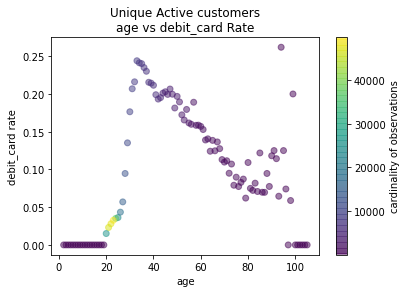

In [39]:
feature_vs_target_w_lengh(df, "age", "debit_card")

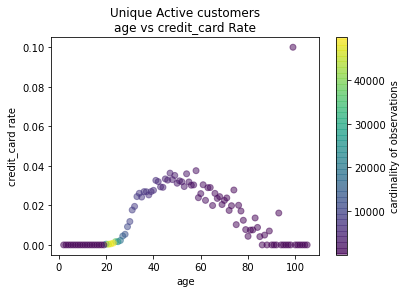

In [40]:
feature_vs_target_w_lengh(df, "age", "credit_card")

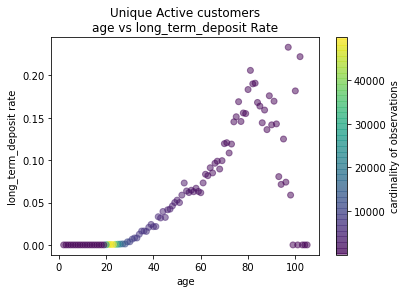

In [41]:
feature_vs_target_w_lengh(df, "age", "long_term_deposit")

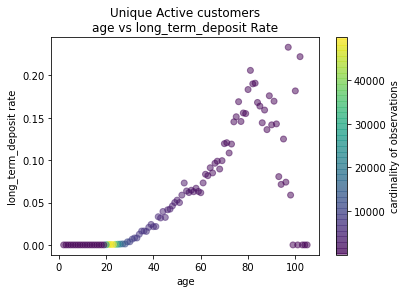

In [42]:
feature_vs_target_w_lengh(df, "age", "long_term_deposit")

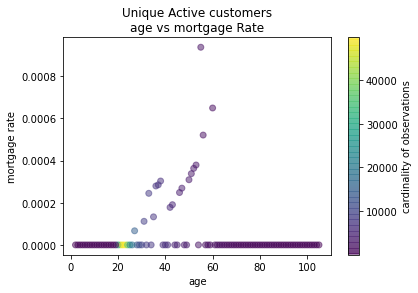

In [43]:
feature_vs_target_w_lengh(df, "age", "mortgage")

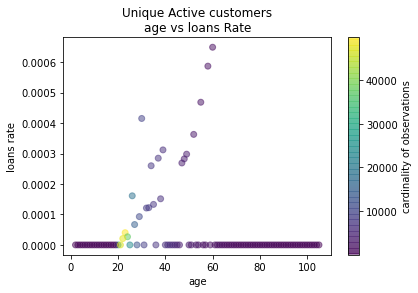

In [44]:
feature_vs_target_w_lengh(df, "age", "loans")

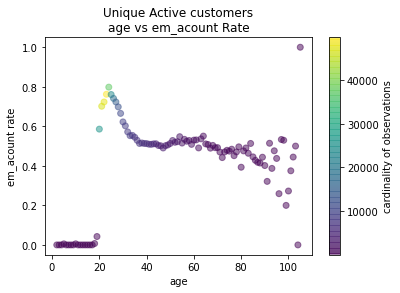

In [45]:
feature_vs_target_w_lengh(df, "age", "em_acount")

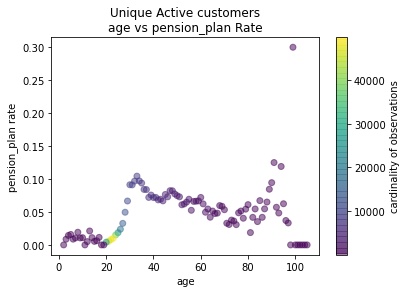

In [46]:
feature_vs_target_w_lengh(df, "age", "pension_plan")

#### Correlation between 3 variables

In [47]:
# Correlation between multiple variables
# ======================================================================================
def four_feature_scatterer(data, category, aggfunc, grouped = True, subset = False):

    title = f"by {category}<br>{list(aggfunc.keys())[0]} vs {list(aggfunc.keys())[1]} vs {list(aggfunc.keys())[2]}"

    if subset != False:
        data = data[data[subset[0]] == subset[1]]
        title = f"{subset[0]} {title}  "
    if grouped == True:
        df_prep = data.groupby(["pk_cid", category]).agg(aggfunc).reset_index()
        vis_data = df_prep.groupby(category).agg(aggfunc).sort_values(by = list(aggfunc.keys())[2], ascending = False)
    else:
        vis_data = data.groupby(category).agg(aggfunc).sort_values(by = list(aggfunc.keys())[2], ascending = False)
        
    fig = px.scatter(
        vis_data, 
        x = list(aggfunc.keys())[0], 
        y = list(aggfunc.keys())[1], 
        color = vis_data.index, 
        size = list(aggfunc.keys())[2])
    fig.update_layout(
        barmode = "overlay",
        title = { "text": title, 
        "x": 0.5, "xanchor": "center" })
    fig.show()

x_y_size = {"salary": "mean", "age": "mean", "active_customer": "sum"}
four_feature_scatterer(df, "region_name", x_y_size)

In [48]:
x_y_size = {"salary": "mean", "age": "mean", "em_acount": "sum"}
four_feature_scatterer(df, "region_name", x_y_size, subset = ["active_customer", 1])

In [49]:
x_y_size = {"salary": "mean", "age": "mean", "em_acount": "sum"}
four_feature_scatterer(df, "region_name", x_y_size, subset = ["active_customer", 1])

In [50]:
x_y_size = {"salary": "mean", "age": "mean", "pension_plan": "sum"}
four_feature_scatterer(df, "region_name", x_y_size, subset = ["active_customer", 1])

In [51]:
x_y_size = {"debit_card": "mean", "credit_card": "mean", "em_acount": "sum"}
four_feature_scatterer(df, "region_name", x_y_size, subset = ["active_customer", 1])

In [52]:
x_y_size = {"credit_card": "sum", "age": "mean", "active_customer": "sum"}
four_feature_scatterer(df, "region_name", x_y_size)

In [53]:
x_y_size = {"salary": "mean", "age": "mean", "active_customer": "sum"}
four_feature_scatterer(df, "entry_channel", x_y_size)

In [54]:
x_y_size = {"salary": "mean", "age": "mean", "active_customer": "sum"}
four_feature_scatterer(df, "country_id", x_y_size)

In [55]:
x_y_size = {"salary": "mean", "age": "mean", "active_customer": "sum"}
four_feature_scatterer(df, "segment", x_y_size)

In [56]:
four_feature_scatterer(df, "entry_channel", {"credit_card": "mean", "debit_card": "mean", "em_acount": "sum"}, subset = ["active_customer", 1])

### 2.2.4 Correlation between combinations of variables and the class <a class="anchor" id="corr_comb"></a>

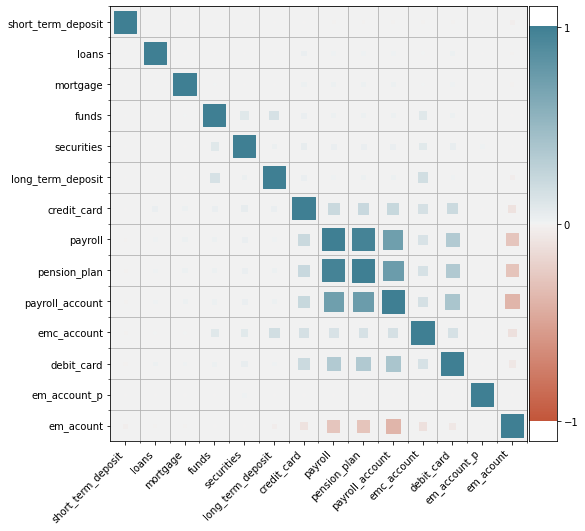

In [57]:
# Correlation between products
# ======================================================================================
products = ["short_term_deposit", "loans", "mortgage", "funds",
            "securities", "long_term_deposit", "credit_card", 
            "payroll","pension_plan", "payroll_account", 
            "emc_account", "debit_card", "em_account_p", "em_acount"]

plt.figure(figsize = (8, 8))
corrplot(df[products].corr(), size_scale = 500)

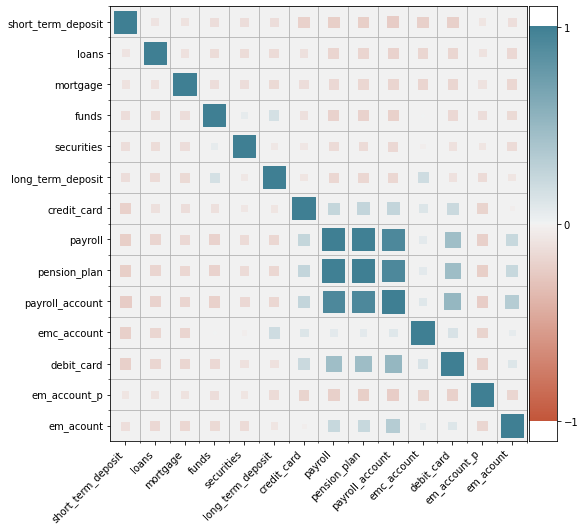

In [58]:
# Correlation between products after dropping nulls
# ======================================================================================
df_diff = df[products].diff().dropna()
df_diff[df_diff != 0] = 1

plt.figure(figsize = (8, 8))
corrplot(df_diff.corr().corr(), size_scale = 500)

- Payroll, payroll_account and pension_plan are highly correlated.
- When the product status of one of them changes, one or two of the others almost always change as well.
- Debit card has some correlation with the 3 above as well

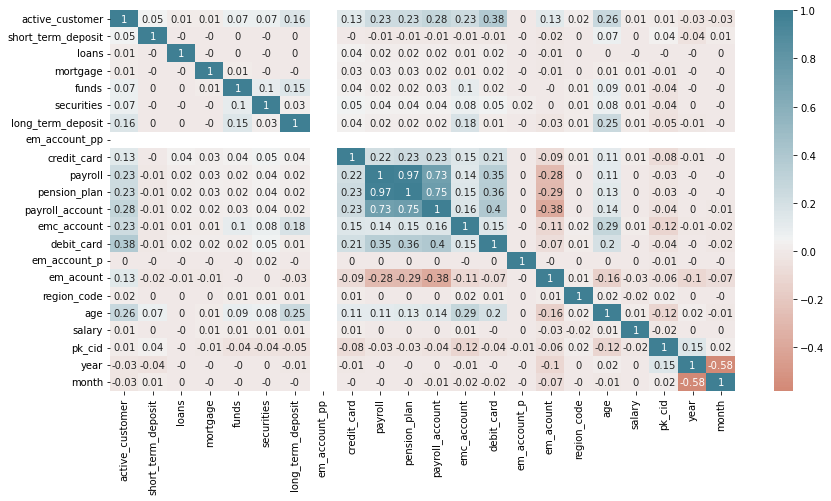

In [59]:
# Correlation
# ======================================================================
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, 
            annot = True, 
            cmap = sns.diverging_palette(20, 220, n=200), 
            center=0.05)

## MLC3: Active vs Inactive Analysis<a class="anchor" id="active_vs_inactive"></a>


### 3.1.1 Distribution of Active vs Inactive by Product <a class="anchor" id="dist_by_product"></a>

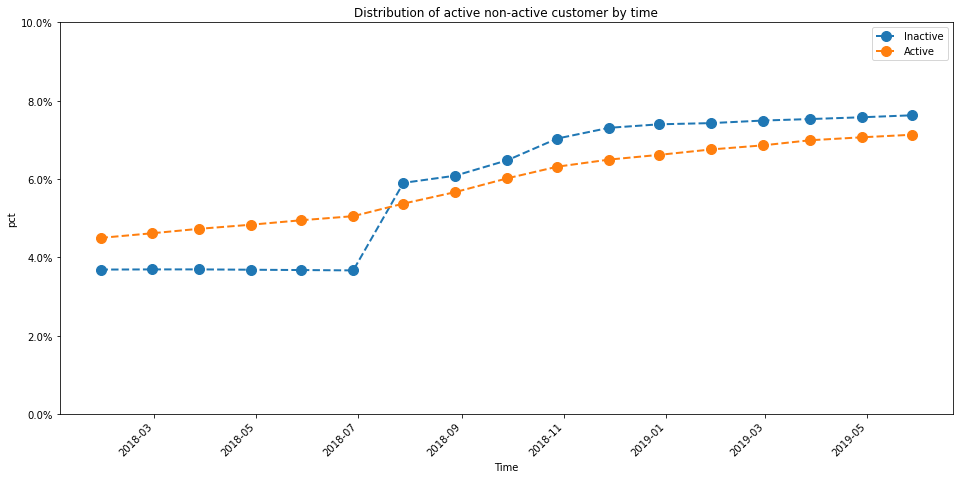

In [151]:
# Distribution of Active Inactive
# ======================================================================================
fig, ax = plt.subplots(figsize=(16, 8))

tmp = df.groupby(["active_customer", "pk_partition"], as_index=False)[["pk_cid"]].nunique()
tmp = tmp.pivot(
    index="active_customer", columns="pk_partition", values="pk_cid"
).apply(lambda x: x * 100 / sum(x), axis=1).transpose()

ax = tmp.plot.line( marker='o', markersize=10, linestyle='--', linewidth=2, ax=ax)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.xticks(rotation=45)
plt.ylim((0,10))
        
plt.xlabel("Time")
plt.ylabel("pct")
ax.legend(['Inactive', 'Active'])
plt.title(f"Distribution of active non-active customer by time")

plt.show()


Text(0.5, 0.98, 'Monthly evolution of product features')

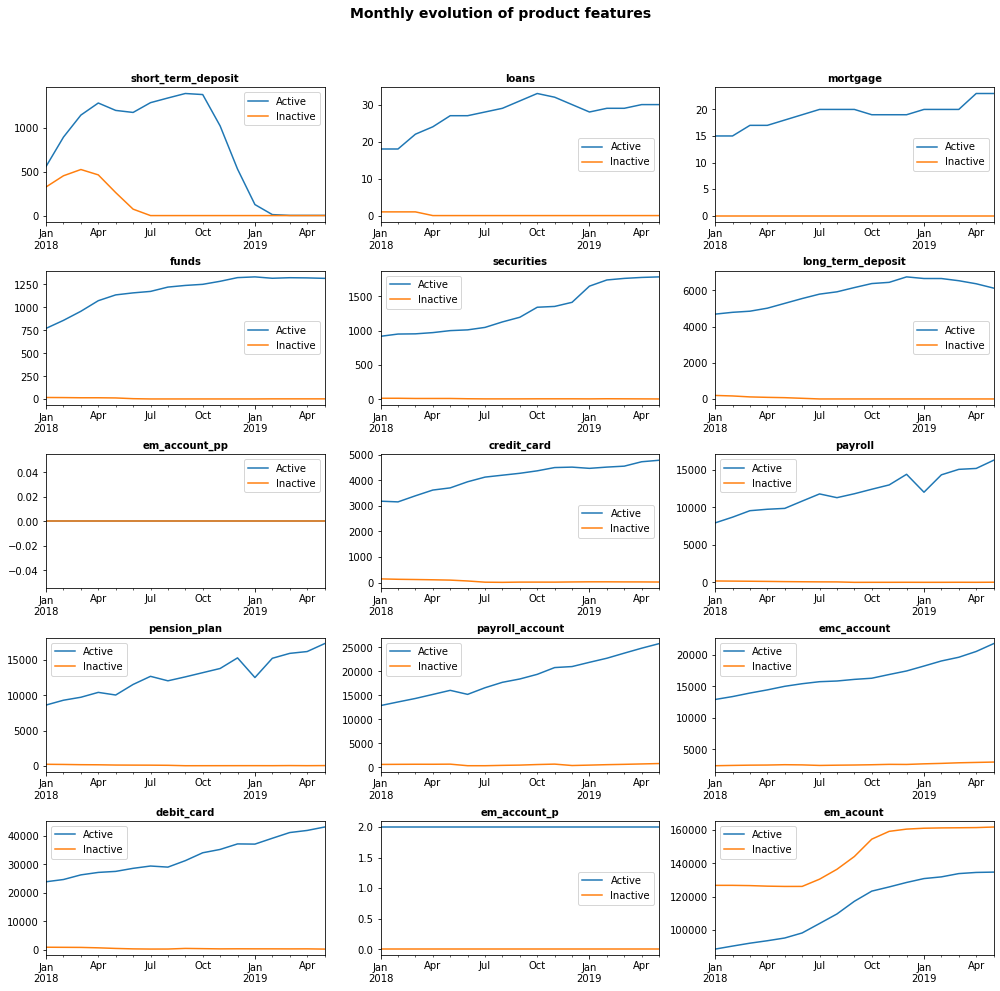

In [156]:
# Product Features, active vs non-active
# ======================================================================================
df['pk_partition'] = pd.to_datetime(df['pk_partition'], format='%Y-%m-%d')
products_df_bydate = df.set_index('pk_partition')

# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14))  
axes = axes.flat

for i, col in enumerate(bool_feat):
    active = products_df_bydate[products_df_bydate['active_customer']==1].resample('M')[col].sum()
    inactive = products_df_bydate[products_df_bydate['active_customer']==0].resample('M')[col].sum()
    active.plot(ax = axes[i], label='Active')
    inactive.plot(ax = axes[i], label='Inactive')
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")
    axes[i].legend()


# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')


Text(0.5, 1.0, 'Total Products bought by a customer')

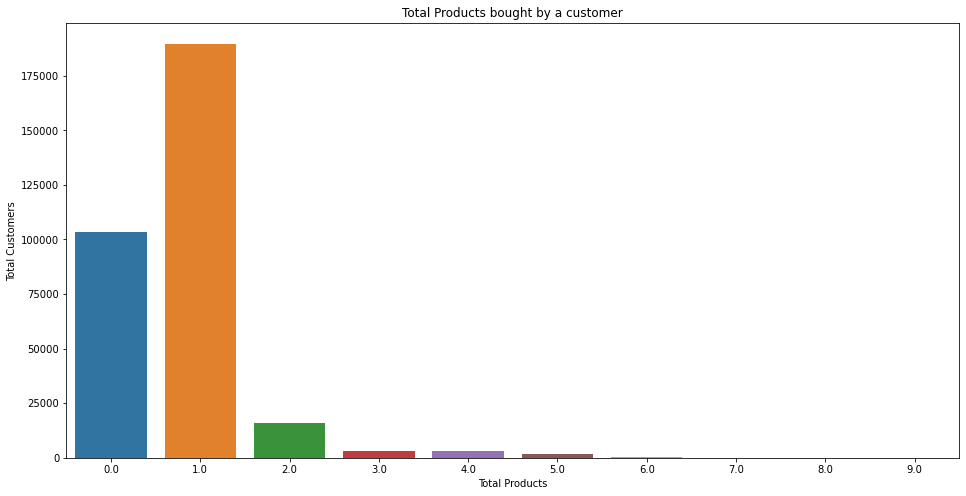

In [220]:
# Plot number of product bought per customer who's inactive
# ======================================================================================

# Create DF for customers with inactive accounts
customers_with_both = df.groupby('pk_cid')['active_customer_label'].nunique()
customers_with_both = customers_with_both[customers_with_both > 1].index.tolist()
filtered_df = df[(df['active_customer_label'] == 'inactive') | (df['pk_cid'].isin(customers_with_both))]

# Create a column that shows the total products ever bought by a customer
grouped_df = filtered_df.groupby('pk_cid')[bool_feat].max()
grouped_df['total_product_customer'] = grouped_df.sum(axis=1)

#Plot countplot with total products bought by inactive customers
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x=grouped_df["total_product_customer"])
        
plt.xlabel("Total Products")
plt.ylabel("Total Customers")
plt.title(f"Total Products bought by a customer")


In [221]:
filtered_df.columns

Index(['entry_date', 'entry_channel', 'active_customer', 'segment',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'pk_cid', 'pk_partition', 'year', 'month',
       'year_month', 'region_name', 'active_customer_label', 'total_products'],
      dtype='object')

## MLC4: Data Preparation<a class="anchor" id="data_preparation"></a>


In [65]:
commercial_df_bydate = df.set_index('pk_partition')

commercial_df_bydate

,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,...,region_code,gender,age,deceased,salary,pk_cid,year,month,year_month,region_name
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES,0,0,0,0,0,0,...,29.00,H,35,N,"87,218.10",1375586,2018,1,2018-01,Malaga
2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO,0,0,0,0,0,0,...,13.00,V,23,N,"35,548.74",1050611,2018,1,2018-01,Ciudad Real
2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO,0,0,0,0,0,0,...,13.00,V,23,N,"122,179.11",1050612,2018,1,2018-01,Ciudad Real
2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO,1,0,0,0,0,0,...,50.00,H,22,N,"119,775.54",1050613,2018,1,2018-01,Zaragoza
2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO,0,0,0,0,0,0,...,50.00,V,23,N,NaN,1050614,2018,1,2018-01,Zaragoza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO,0,0,0,0,0,0,...,50.00,V,22,N,"43,912.17",1166765,2019,5,2019-05,Zaragoza
2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO,0,0,0,0,0,0,...,26.00,V,23,N,"23,334.99",1166764,2019,5,2019-05,La Rioja
2019-05-28,2016-08-14,KHE,1.00,02 - PARTICULARES,0,0,0,0,0,0,...,50.00,H,47,N,NaN,1166763,2019,5,2019-05,Zaragoza


In [78]:
commercial_df_bydate = df.set_index('pk_partition')
print(commercial_df_bydate)

              entry_date entry_channel  active_customer             segment  \
pk_partition                                                                  
2018-01-28    2018-01-12           KHL             1.00   02 - PARTICULARES   
2018-01-28    2015-08-10           KHE             0.00  03 - UNIVERSITARIO   
2018-01-28    2015-08-10           KHE             0.00  03 - UNIVERSITARIO   
2018-01-28    2015-08-10           KHD             0.00  03 - UNIVERSITARIO   
2018-01-28    2015-08-10           KHE             1.00  03 - UNIVERSITARIO   
...                  ...           ...              ...                 ...   
2019-05-28    2016-08-14           KHE             0.00  03 - UNIVERSITARIO   
2019-05-28    2016-08-14           KHE             0.00  03 - UNIVERSITARIO   
2019-05-28    2016-08-14           KHE             1.00   02 - PARTICULARES   
2019-05-28    2016-08-14           KHE             0.00  03 - UNIVERSITARIO   
2019-05-28    2019-05-13           NaN             1

## MLC5: Segmentation Modeling<a class="anchor" id="seg_modeling"></a>


TO DO: PCA

In [11]:
# Import Libraries for Modeling
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [13]:
df.columns

Index(['entry_date', 'entry_channel', 'active_customer', 'segment',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'pk_cid', 'pk_partition', 'year', 'month',
       'year_month', 'region_name'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 31 columns):
 #   Column              Dtype         
---  ------              -----         
 0   entry_date          object        
 1   entry_channel       object        
 2   active_customer     float64       
 3   segment             object        
 4   short_term_deposit  int64         
 5   loans               int64         
 6   mortgage            int64         
 7   funds               int64         
 8   securities          int64         
 9   long_term_deposit   int64         
 10  em_account_pp       int64         
 11  credit_card         int64         
 12  payroll             float64       
 13  pension_plan        float64       
 14  payroll_account     int64         
 15  emc_account         int64         
 16  debit_card          int64         
 17  em_account_p        int64         
 18  em_acount           int64         
 19  country_id          object        
 20  re

In [72]:
# Selected Features
# ==============================================================================

numerical_cols = ['active_customer','age']

X = df[numerical_cols].dropna()

X_scaled = scale(X)


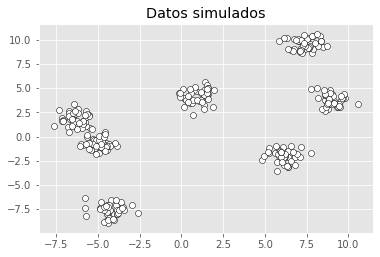

In [73]:
# Simulation of the Data
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 19, 
        centers      = 7, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [74]:
# Model
# ==============================================================================
modelo_kmeans = KMeans(n_clusters=7, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=7, n_init=25, random_state=123)

In [64]:
# Modelo classification kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

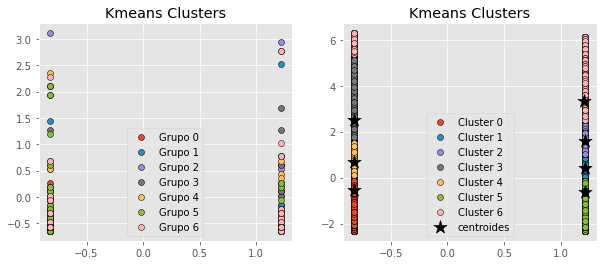

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Original Group
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[np.ix_(y == i, [0])],
        y = X_scaled[np.ix_(y == i, [1])], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Kmeans Clusters')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[np.ix_(y_predict == i, [0])],
        y = X_scaled[np.ix_(y_predict == i, [1])], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Kmeans Clusters')
ax[1].legend();


### Find the optimal k value

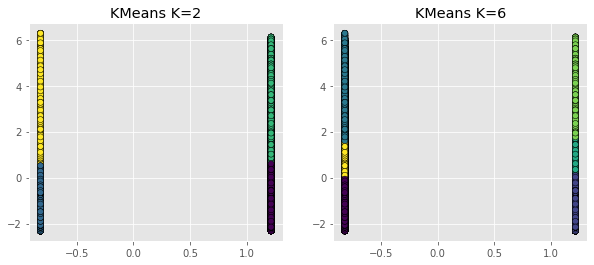

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Result for K = 4
# ==============================================================================
y_predict = KMeans(n_clusters=4, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Result para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

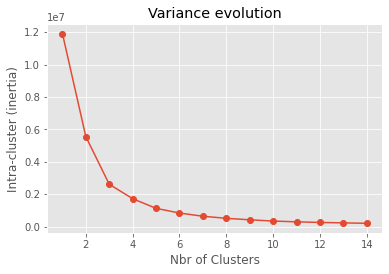

In [78]:
# Find the optimal number of clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Variance evolution")
ax.set_xlabel('Nbr of Clusters')
ax.set_ylabel('Intra-cluster (inertia)');

### Jaccard

In [66]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/Users/agustinagarcia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/Users/agustinagarcia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [71]:
# Selected Features
# ==============================================================================

numerical_cols = ['active_customer','age']

X = df[numerical_cols].dropna()

X_scaled = scale(X)